In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

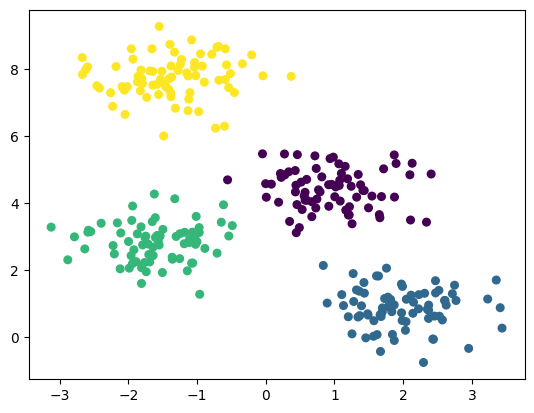

In [20]:
blobs_data = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = blobs_data[0]
y = blobs_data[1]

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap='viridis')


In [21]:
class KMeans_own:
    def __init__(self, k=4, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        n_samples, n_features = X.shape
        random_sample_idxs = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_sample_idxs]

        for _ in range(self.max_iters):
            self.labels = self._assign_clusters(X)
            old_centroids = self.centroids.copy()
            self.centroids = self._compute_centroids(X)

            if np.all(old_centroids == self.centroids):
                break

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X):
        centroids = np.zeros((self.k, X.shape[1]))
        for idx in range(self.k):
            points = X[self.labels == idx]
            centroids[idx] = points.mean(axis=0) if len(points) > 0 else self.centroids[idx]
        return centroids

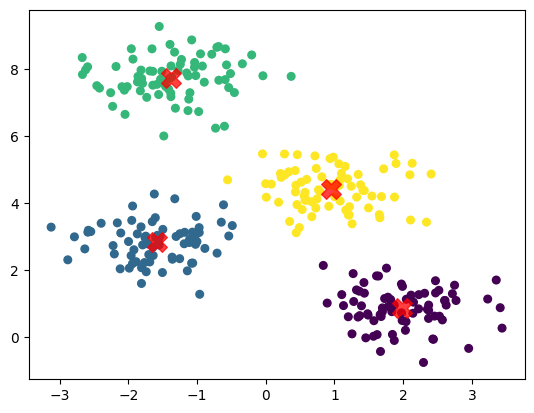

In [22]:
model = KMeans_own(k=4)
model.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels, s=30, cmap='viridis')
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.show()

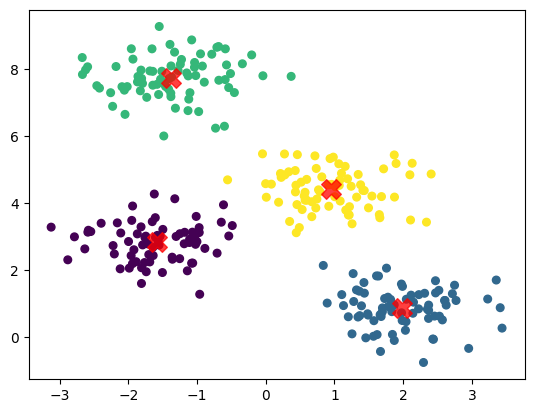

In [23]:
model_2 = KMeans(n_clusters=4)
model_2.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model_2.labels_, s=30, cmap='viridis')
plt.scatter(model_2.cluster_centers_[:, 0], model_2.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.show()

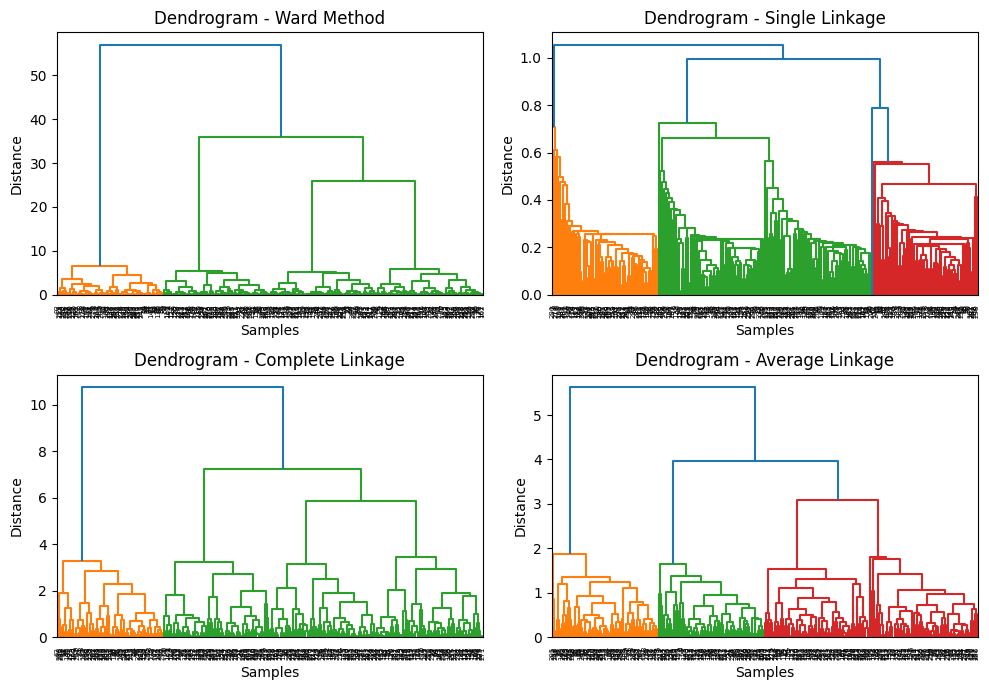

In [25]:
Z_1 = linkage(X, method='ward')
Z_2 = linkage(X, method='single')
Z_3 = linkage(X, method='complete')
Z_4 = linkage(X, method='average')
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
dendrogram(Z_1)
plt.title("Dendrogram - Ward Method")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.subplot(2, 2, 2)
dendrogram(Z_2)
plt.title("Dendrogram - Single Linkage")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.subplot(2, 2, 3)
dendrogram(Z_3)
plt.title("Dendrogram - Complete Linkage")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.subplot(2, 2, 4)
dendrogram(Z_4)
plt.title("Dendrogram - Average Linkage")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

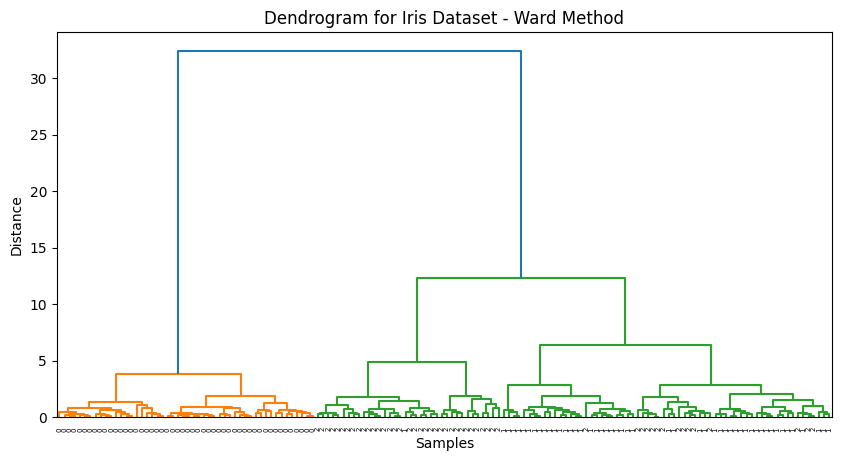

In [28]:
iris = load_iris()
X_iris = iris.data
Z_iris = linkage(X_iris, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z_iris, labels=iris.target)
plt.title("Dendrogram for Iris Dataset - Ward Method")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()